In [16]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [17]:
df = pd.read_csv("data/finanzas_hotel_bookings.csv", index_col=0)

/tmp/ipykernel_672/1059111946.py:1: DtypeWarning: Columns (1,2,5,13,14,15,16,20,21,26,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/finanzas_hotel_bookings.csv", index_col=0)


In [18]:
def entender_datos(df):
    # Encabezado
    print("INFO SOBRE NUESTROS DATOS")
    print("============================================================================")
    # Información general
    print(f"El número de filas es: {df.shape[0]}")
    print(f"El número de columnas es: {df.shape[1]}")
    print("============================================================================")
    # Descripción del DataFrame
    print("DESCRIPCIÓN ESTADÍSTICA DE VARIABLES NUMÉRICAS")
    print(df.describe().T)
    print("============================================================================")
    # Columnas del DataFrame
    print("COLUMNAS")
    print(df.columns)
    print("============================================================================")
    # Filas duplicadas
    print(f"Número de filas duplicadas: {df.duplicated().sum()}")
    print("============================================================================")
    # Valores nulos totales
    print(f"Total de valores nulos: {df.isna().sum().sum()}")
    print("============================================================================")
    # Valores nulos por columna
    print("VALORES NULOS POR COLUMNA")
    print(df.isna().sum())
    print("============================================================================")
    #Porcentaje de valores nulos por columna
    print("PORCENTAJE NULOS POR COLUMNA")
    print(round(df.isna().sum() / df.shape[0] * 100,2))
    print("============================================================================")
    # Tipos de datos
    print("TIPOS DE DATOS")
    print(df.dtypes.value_counts())
    print("============================================================================")
    # Información del DataFrame
    print("INFORMACIÓN DETALLADA")
    df.info()
    print("============================================================================")

In [19]:
# Eliminamos ultimas filas que tienen en su mayoría valores nulos y no sirven para el análisis
df = df.iloc[:119390]

In [20]:
entender_datos(df)

INFO SOBRE NUESTROS DATOS
El número de filas es: 119390
El número de columnas es: 32
DESCRIPCIÓN ESTADÍSTICA DE VARIABLES NUMÉRICAS
                                   count         mean         std      min  \
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year                64829.0  2016.156196    0.706674  2015.00   
arrival_date_week_number        101004.0    27.175785   13.613871     1.00   
arrival_date_day_of_month       119271.0    15.795977    8.780503     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     6.241712   14.576254     0.00   
children                         69270.0     0.118348    0.607353     0.00   
babies                          119390.0     0.014976    0.337699     0.00   
is_repeated_guest               114376.0     0.031877    0.175674     0.00   
previous_c

In [21]:
print("DESCRIPCIÓN DE VARIABLES CATEGÓRICAS")


#Creo un data frame con las columnas tipo objeto
df_cat = df.select_dtypes(include = "object")
# creamos una variable con los nombres de las columnas del DataFrame de las variables categóricas utilizando el método '.columns'
columnas_cat = df_cat.columns
print(f"Las columnas del DataFrame de variables categóricas son {columnas_cat}")
# empezamos a iterar por cada una de las columnas para sacar sus valores únicos y sus frecuencias
for columna in columnas_cat:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_cat[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_cat[columna].value_counts()} ")

DESCRIPCIÓN DE VARIABLES CATEGÓRICAS
Las columnas del DataFrame de variables categóricas son Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'customer_type', 'reservation_status',
       'reservation_status_date', '0'],
      dtype='object')
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'HOTEL' -----------

Sus valores únicos son: ['Resort Hotel' 'City Hotel']

Las frecuencias de los valores únicos de las categorías son: City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'IS_CANCELED' -----------

Sus valores únicos son: [False True]

Las frecuencias de los valores únicos de las categorías son: False    75166
True     44224
Name: is_canceled, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'ARRIVAL_DATE_MONTH' -----------

Sus valores únicos son: ['July' 'August' 'September' 'October' 'Nove

ANÁLISIS VISUAL DE LA DISTRIBUCIÓN DE LA COLUMNA 'adr'


<AxesSubplot:xlabel='adr'>

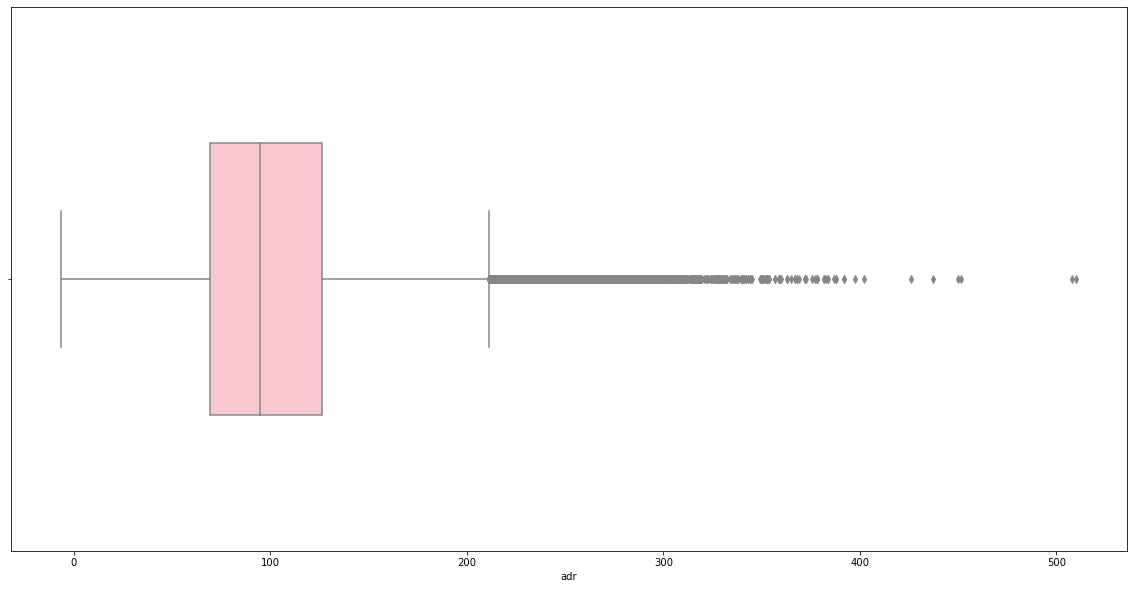

In [22]:
print("ANÁLISIS VISUAL DE LA DISTRIBUCIÓN DE LA COLUMNA 'adr'")



plt.figure(figsize=(20, 10))
sns.boxplot(x = "adr", 
            data = df[df["adr"]<1000], # filtramos los valores menores que 1000 para eliminar un outlier con valor extremadamente alto
            width = 0.5, 
            color = "pink")